## Pussy Gift. BOOT, ATOM, OSMO, LUNA, HUAHUA, JUNO, DSM, STARS, UMEE, GRAV and EVMOS Analysis

In [1]:
import pandas as pd
import numpy as np
from math import log10
from typing import Optional
import matplotlib.pyplot as plt
import matplotlib as mpl
import ipfshttpclient
from IPython.core.display import display, HTML

from src.extractor_cosmos_sdk_snapshots import get_balances
from src.utils_charts import grade_boundaries_analysis

In [2]:
TOTAL_GIFT_SIZE = 95e16
GIFT_PER_SEGMENT = {
    'Bostrom': 10e16,
    'Desmos': 10e16
}
INITIAL_BOUNDARY_DICT = {
    'atom': 0.1,
    'luna': 1,
    'osmo': 1,
    'huahua': 10_000,
    'boot': 10_000,
    'dsm': 30,
    'juno': 0.5,
    'stars': 20,
    'umee': 100,
    'graviton': 100,
    'evmos': 2
}
FINAL_STATE_FILE_NAME = 'data/pussy/pussygift_state_final_221228.csv'

In [3]:
def set_grade(x: float, boundaries: list) -> Optional[int]:
    if x > boundaries[2]:
        return int(3)
    elif x > boundaries[1]:
        return int(2)
    elif x > boundaries[0]:
        return int(1)
    return None


def analyze_chain(snapshot_url: str,
                  coin: str,
                  coin_for_display: str,
                  initial_boundary: float,
                  max_show_value: int,
                  segment: str,
                  decimals: int = 6,
                  value_transform_func=lambda x: log10(x) if x >= 0.1 else -1.8,
                  balances_items=None) -> [pd.DataFrame, list]:
    if balances_items is None:
        balances_items = ['delegated', 'liquidity']

    _balances_df = get_balances(snapshot_url=snapshot_url, coin=coin, decimals=decimals,
                                balances_items=balances_items)

    _balances_agg_df = _balances_df.groupby('balance_coin').agg(
        number_of_addresses=('address', np.count_nonzero),
        balance_coin_rounded=('balance_coin_rounded', np.max)).reset_index()

    _boundaries = grade_boundaries_analysis(
        distribution_df=_balances_agg_df,
        value_column='balance_coin',
        chart_value_column='balance_coin_rounded',
        address_column='number_of_addresses',
        address_chart_label='Number of Addresses, log10',
        value_chart_label=f'{coin_for_display} Balance, log10',
        value_name=f'{coin_for_display} Balance',
        value_transform_func=value_transform_func,
        chart_title=f'Distribution of {coin_for_display} Balances by Addresses',
        max_show_value=max_show_value,
        initial_boundary=initial_boundary,
        level_line_shift=0,
        boundary_round=0)

    _balances_df.loc[:, 'grade'] = _balances_df['balance_coin'].map(
        lambda x: set_grade(x, boundaries=_boundaries))
    _balances_df.loc[:, 'segment'] = segment

    return _balances_df, _boundaries

### Snapshots
<table style="text-align: center">
    <thead>
        <tr>
            <th>Network</th>
            <th>Block</th>
            <th>IPFS address</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: left"> Bostrom </td>
            <td style="text-align: right"> 4,939,850 </td>
            <td> Qmd14xh9JgcRPbHjQiBAVX8SiJVKRHjFujYSvRq2m8TCVi </td>
        </tr>
        <tr>
            <td style="text-align: left"> Chihuahua </td>
            <td style="text-align: right"> 4,890,535 </td>
            <td> QmQ6bvNhQdwcusy6gZbY4ZZ64QU6s24bbjD3v2L9HUcWZP </td>
        </tr>
        <tr>
            <td style="text-align: left"> Cosmoshub </td>
            <td style="text-align: right"> 12,948,921 </td>
            <td> QmTkEiyT4e57WvKywwNWSu38Gt8CbJFhhLXkhPeydqQv4x </td>
        </tr>
        <tr>
            <td style="text-align: left"> Desmos </td>
            <td style="text-align: right"> 6,121,401 </td>
            <td> QmTMirj25z7mBVAVUmP6hRFQhvoe5wnfLbTd7taPWKukcz </td>
        </tr>
        <tr>
            <td style="text-align: left"> Evmos </td>
            <td style="text-align: right"> 7,682,206 </td>
            <td> QmP8WTErU65z3n1tq8ooVawkj54MiqGQiLHpPMMCHD4jcW </td>
        </tr>
        <tr>
            <td style="text-align: left"> Gravity </td>
            <td style="text-align: right"> 4,684,716 </td>
            <td> QmcTmU3PKJkD3ExfdKyeXFSytUZpPzMxbQL38Lm7o6LkLG </td>
        </tr>
        <tr>
            <td style="text-align: left"> Juno </td>
            <td style="text-align: right"> 5,837,080 </td>
            <td> QmdgF4yuV7Xkew2kdBPMcAi6j2KKG4ZUwQAxCUKSBvd1z1 </td>
        </tr>
        <tr>
            <td style="text-align: left"> Osmosis </td>
            <td style="text-align: right"> 7,025,000 </td>
            <td> QmervCGgj4Ang8ePx7SoJ4axzZ2KGyXoAQsW6tXb4Hr15q </td>
        </tr>
        <tr>
            <td style="text-align: left"> Stargaze </td>
            <td style="text-align: right"> 5,720,382 </td>
            <td> Qma6jVhRrxadmBxQCQv43fxBcWgWYbcEWBc6dj2Tq9VYht </td>
        </tr>
        <tr>
            <td style="text-align: left"> Terra </td>
            <td style="text-align: right"> 2,544,937 </td>
            <td> QmTH9ys65yCrNWxmEFr1XUZCnxWuJheQgC8JWbMhF3YPqW </td>
        </tr>
        <tr>
            <td style="text-align: left"> Umee </td>
            <td style="text-align: right"> 3,984,825 </td>
            <td> QmPDSL6oQQC4bzKnZ47gnVkpTjHDwkcwcw7ZRvB5fsRHTo </td>
        </tr>
    </tbody>
</table>

### Analysis of Grade Boundaries. HUAHUA Owners
HUAHUA balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,"10,000 < HUAHUA Balance <= 1,805,215","19,627",89.0
2,"1,805,215 < HUAHUA Balance <= 25,590,943","2,205",10.0
3,"25,590,943 < HUAHUA Balance",222,1.0


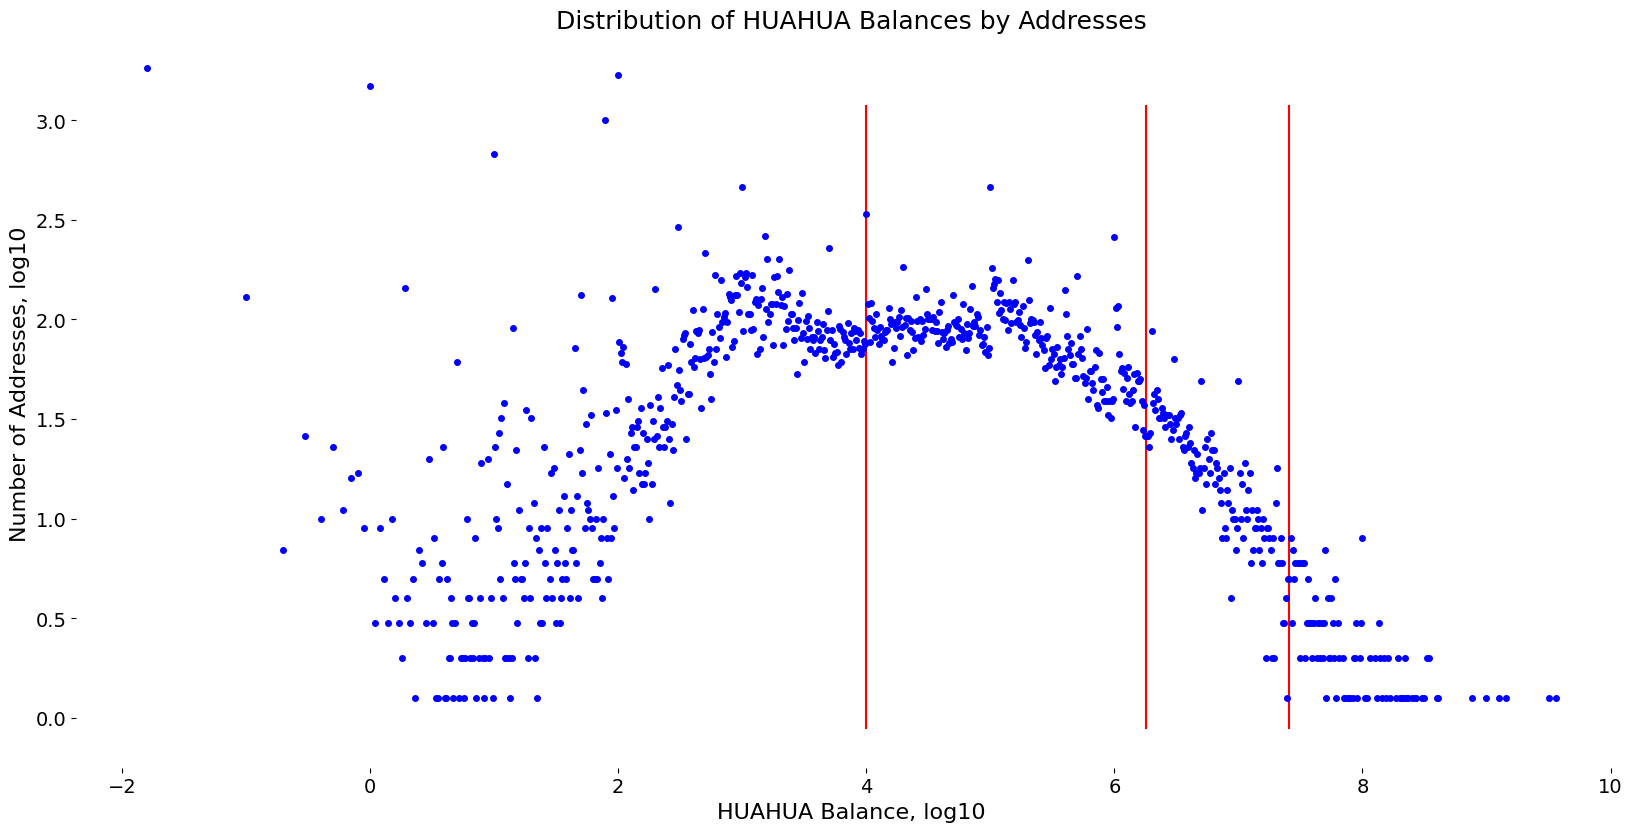

In [4]:
huahua_balances_df, huahua_boundaries = analyze_chain(
    snapshot_url='data/pussy/chihuahua_4890535.json',
    coin='uhuahua',
    coin_for_display='HUAHUA',
    initial_boundary=INITIAL_BOUNDARY_DICT['huahua'],
    max_show_value=10_000_000_000,
    segment='ChiHuaHua')

### Analysis of Grade Boundaries. BOOT Owners
BOOT balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,"10,000 < BOOT Balance <= 1,383,480,819","6,256",89.0
2,"1,383,480,819 < BOOT Balance <= 144,305,883,038",702,10.0
3,"144,305,883,038 < BOOT Balance",71,1.0


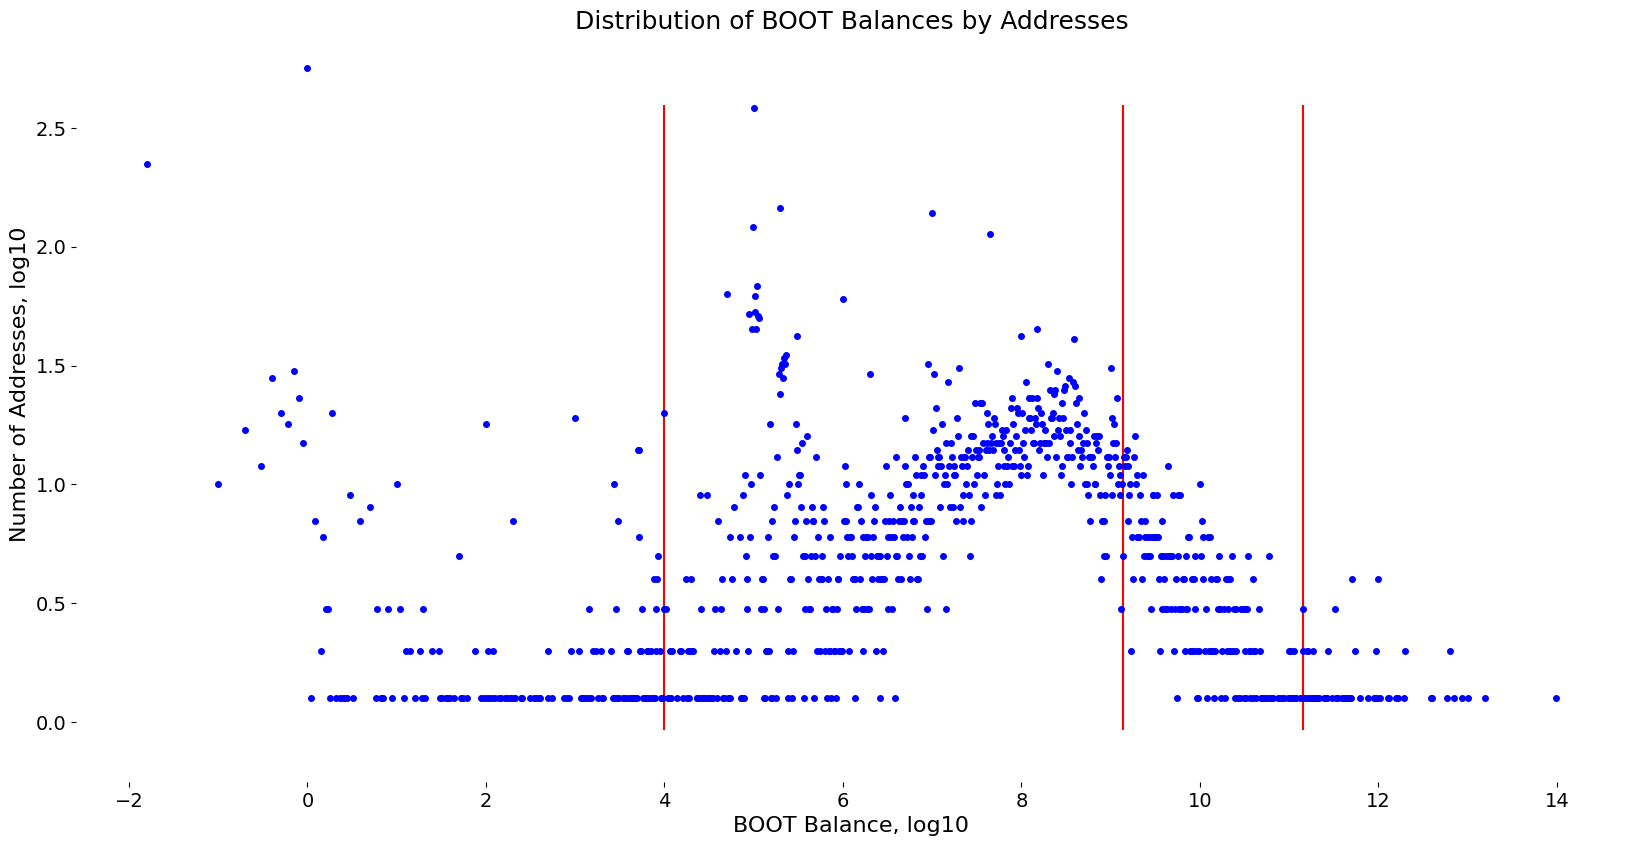

In [5]:
boot_balances_df, boot_boundaries = analyze_chain(
    snapshot_url='data/pussy/bostrom_4939850.json',
    coin='boot',
    coin_for_display='BOOT',
    initial_boundary=INITIAL_BOUNDARY_DICT['boot'],
    max_show_value=200_000_000_000_000,
    segment='Bostrom',
    decimals=0)

### Analysis of Grade Boundaries. DMS Owners
DMS balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,"30 < DSM Balance <= 2,125","6,129",89.0
2,"2,125 < DSM Balance <= 142,856",690,10.0
3,"142,856 < DSM Balance",69,1.0


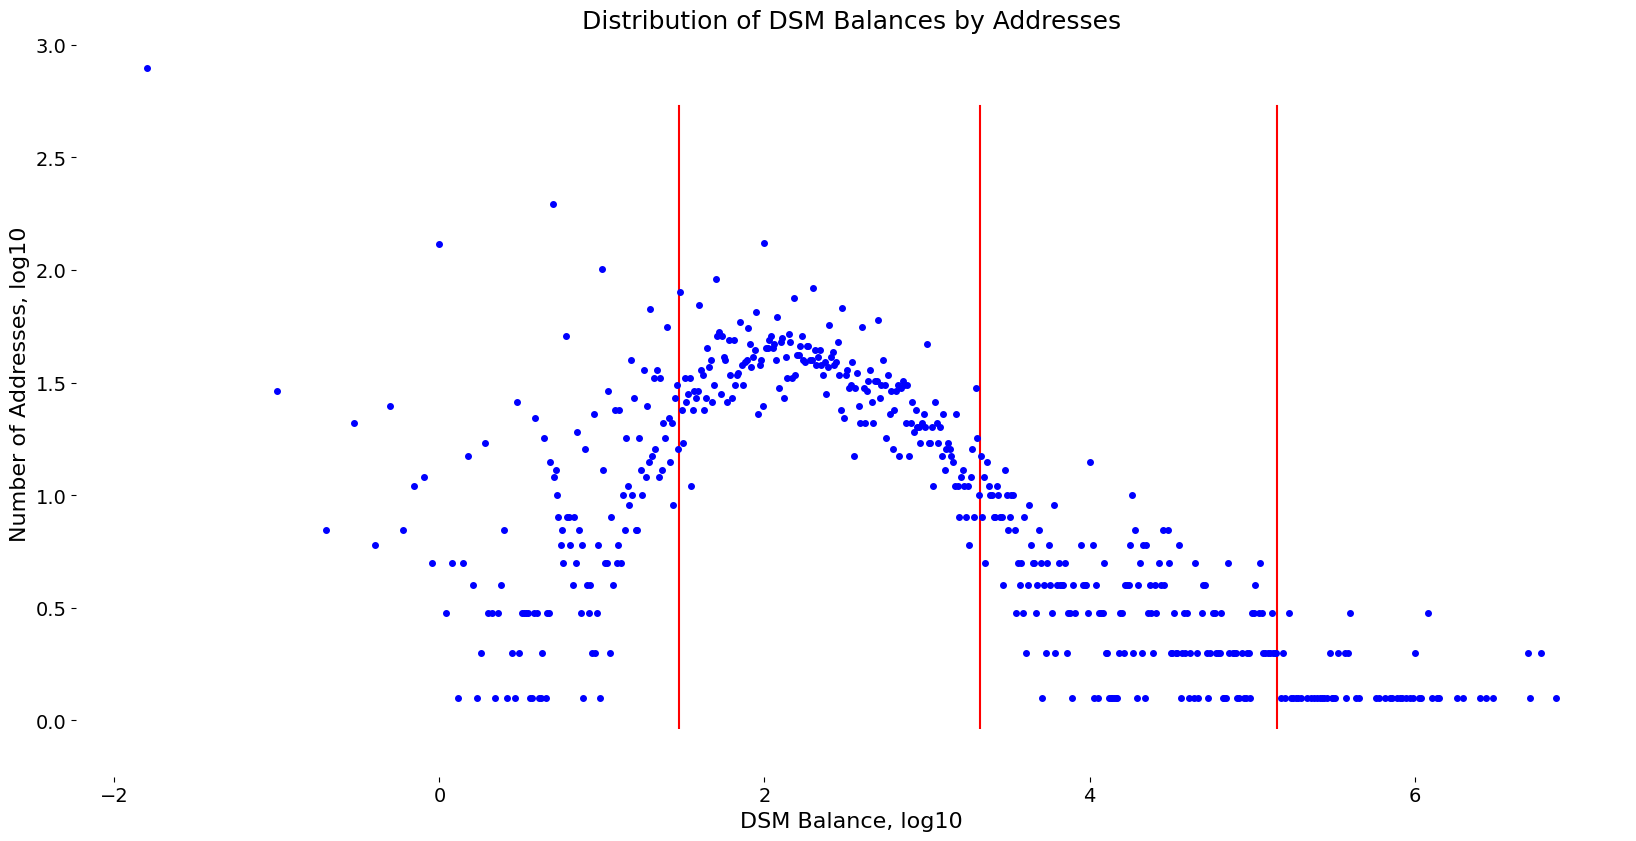

In [6]:
dsm_balances_df, dsm_boundaries = analyze_chain(
    snapshot_url='data/pussy/desmos_6121401.json',
    coin='udsm',
    coin_for_display='DSM',
    initial_boundary=INITIAL_BOUNDARY_DICT['dsm'],
    max_show_value=1_000_000_000_000,
    segment='Desmos')

### Analysis of Grade Boundaries. GRAV Owners
GRAV balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,"100 < GRAV Balance <= 14,240","5,198",89.0
2,"14,240 < GRAV Balance <= 930,754",584,10.0
3,"930,754 < GRAV Balance",58,1.0


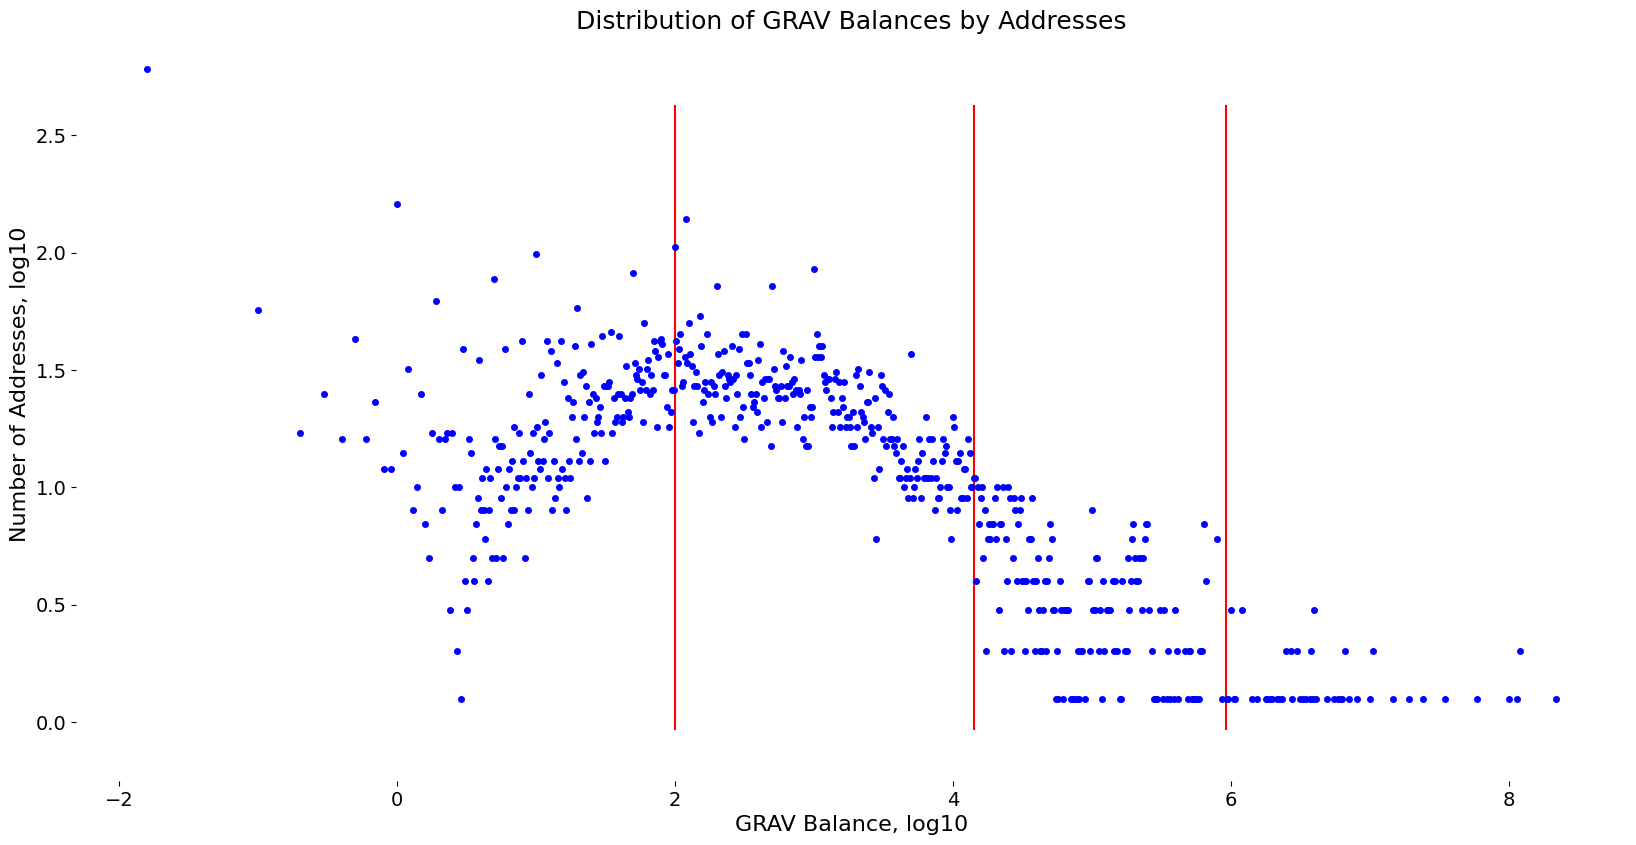

In [7]:
grav_balances_df, grav_boundaries = analyze_chain(
    snapshot_url='data/pussy/gravity_4684716.json',
    coin='ugraviton',
    coin_for_display='GRAV',
    initial_boundary=INITIAL_BOUNDARY_DICT['graviton'],
    max_show_value=1_000_000_000_000,
    segment='Gravity')

### Analysis of Grade Boundaries. JUNO Owners
JUNO balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,0.5 < JUNO Balance <= 201,"94,712",89.1
2,"201 < JUNO Balance <= 4,136","10,567",9.9
3,"4,136 < JUNO Balance","1,064",1.0


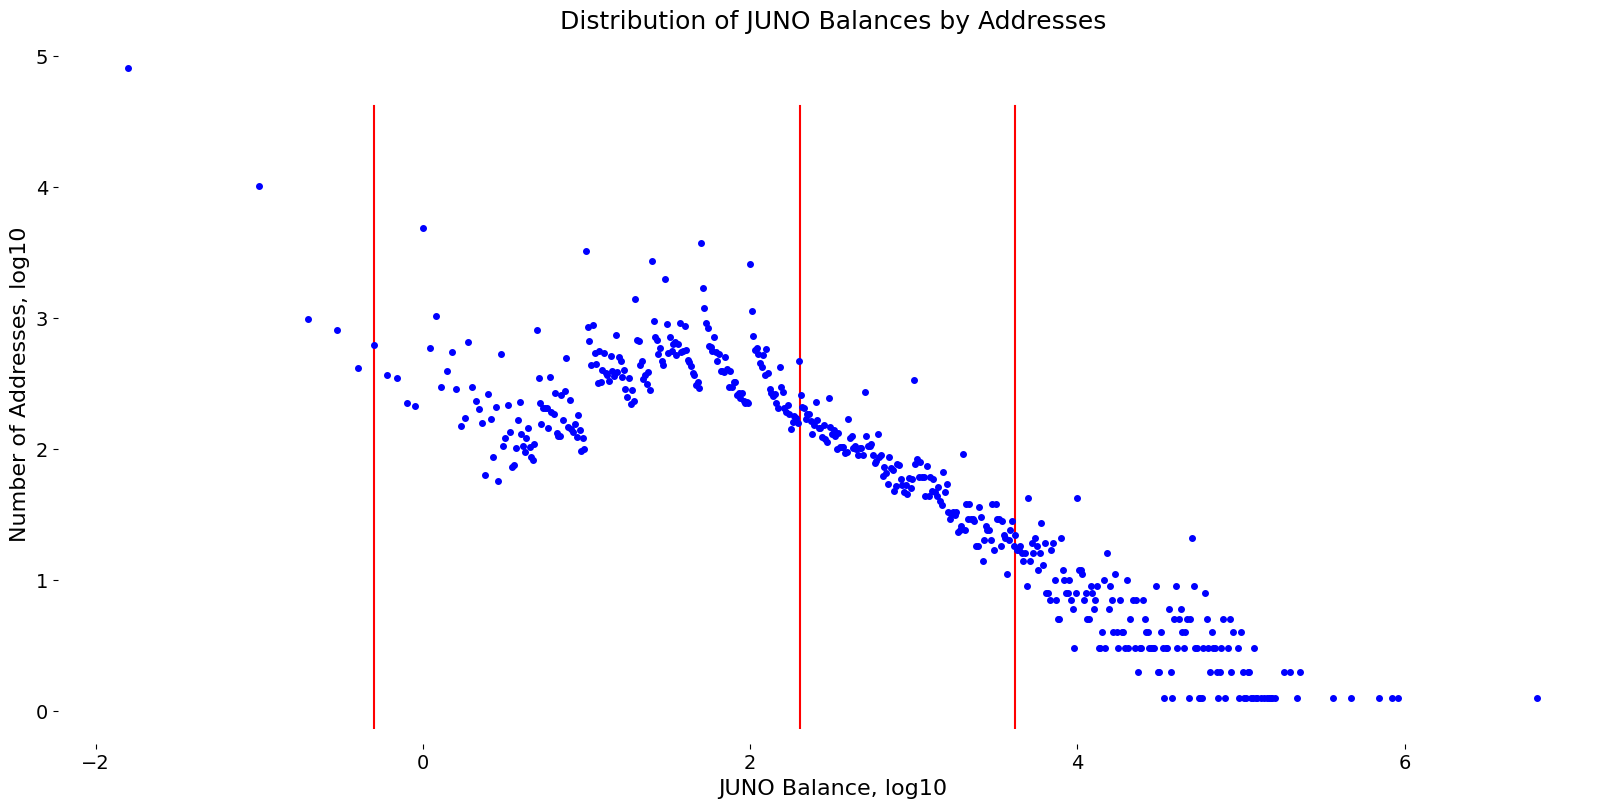

In [8]:
juno_balances_df, juno_boundaries = analyze_chain(
    snapshot_url='data/pussy/juno_5837080.json',
    coin='ujuno',
    coin_for_display='JUNO',
    initial_boundary=INITIAL_BOUNDARY_DICT['juno'],
    max_show_value=100_000_000,
    segment='Juno')

### Analysis of Grade Boundaries. STARS Owners
STARS balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,"20 < STARS Balance <= 6,147","36,836",89.0
2,"6,147 < STARS Balance <= 125,126","4,139",10.0
3,"125,126 < STARS Balance",414,1.0


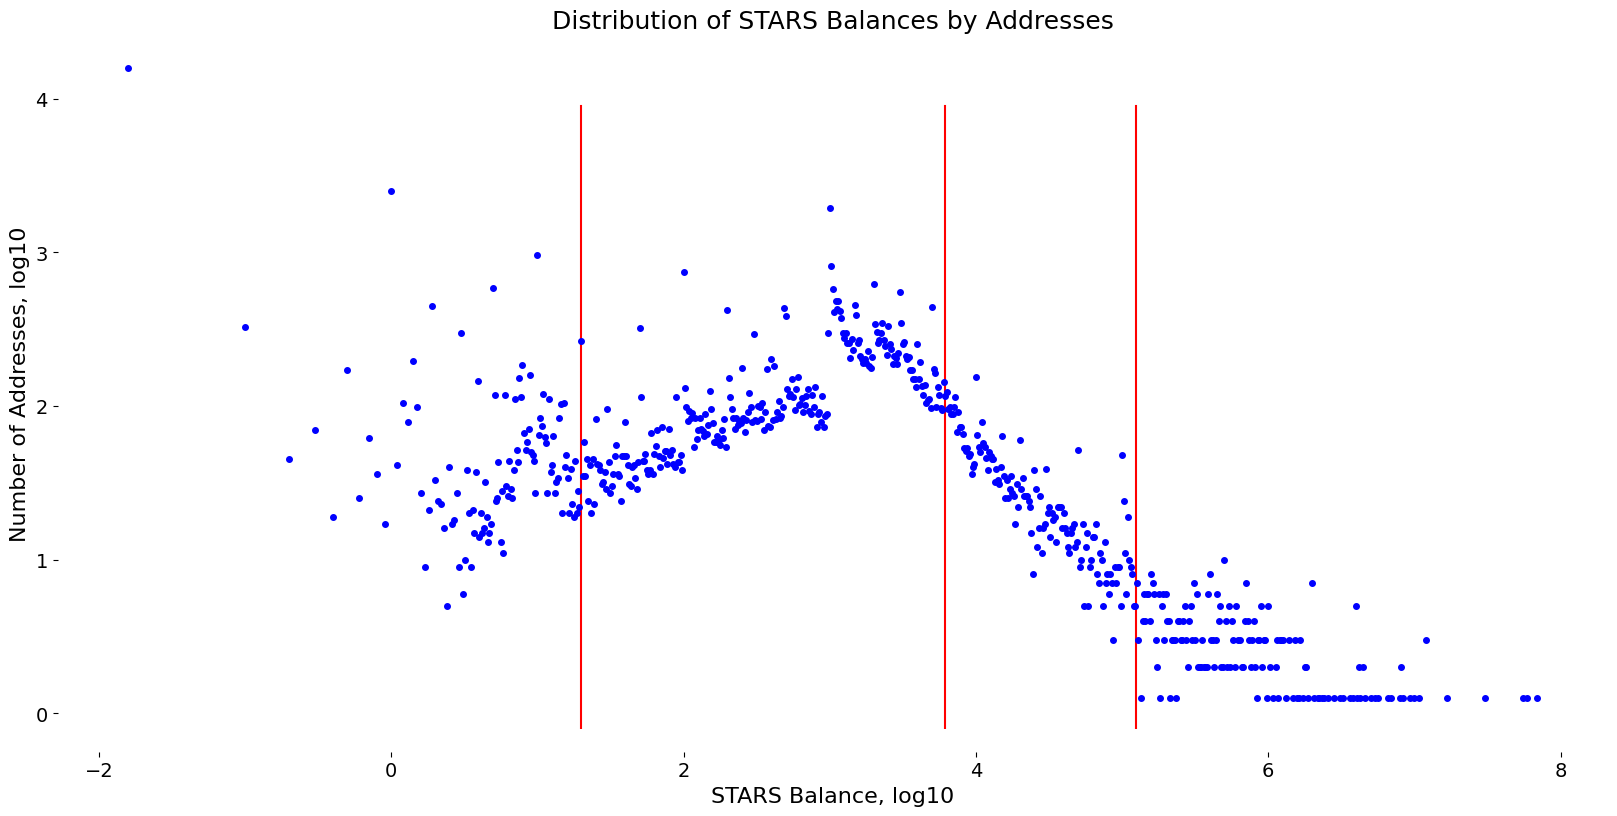

In [9]:
stars_balances_df, stars_boundaries = analyze_chain(
    snapshot_url='data/pussy/stargaze_5720382.json',
    coin='ustars',
    coin_for_display='STARS',
    initial_boundary=INITIAL_BOUNDARY_DICT['stars'],
    max_show_value=100_000_000,
    segment='Stargaze')

### Analysis of Grade Boundaries. UMEE Owners
UMEE balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,"100 < UMEE Balance <= 10,571","69,080",89.0
2,"10,571 < UMEE Balance <= 65,552","7,762",10.0
3,"65,552 < UMEE Balance",776,1.0


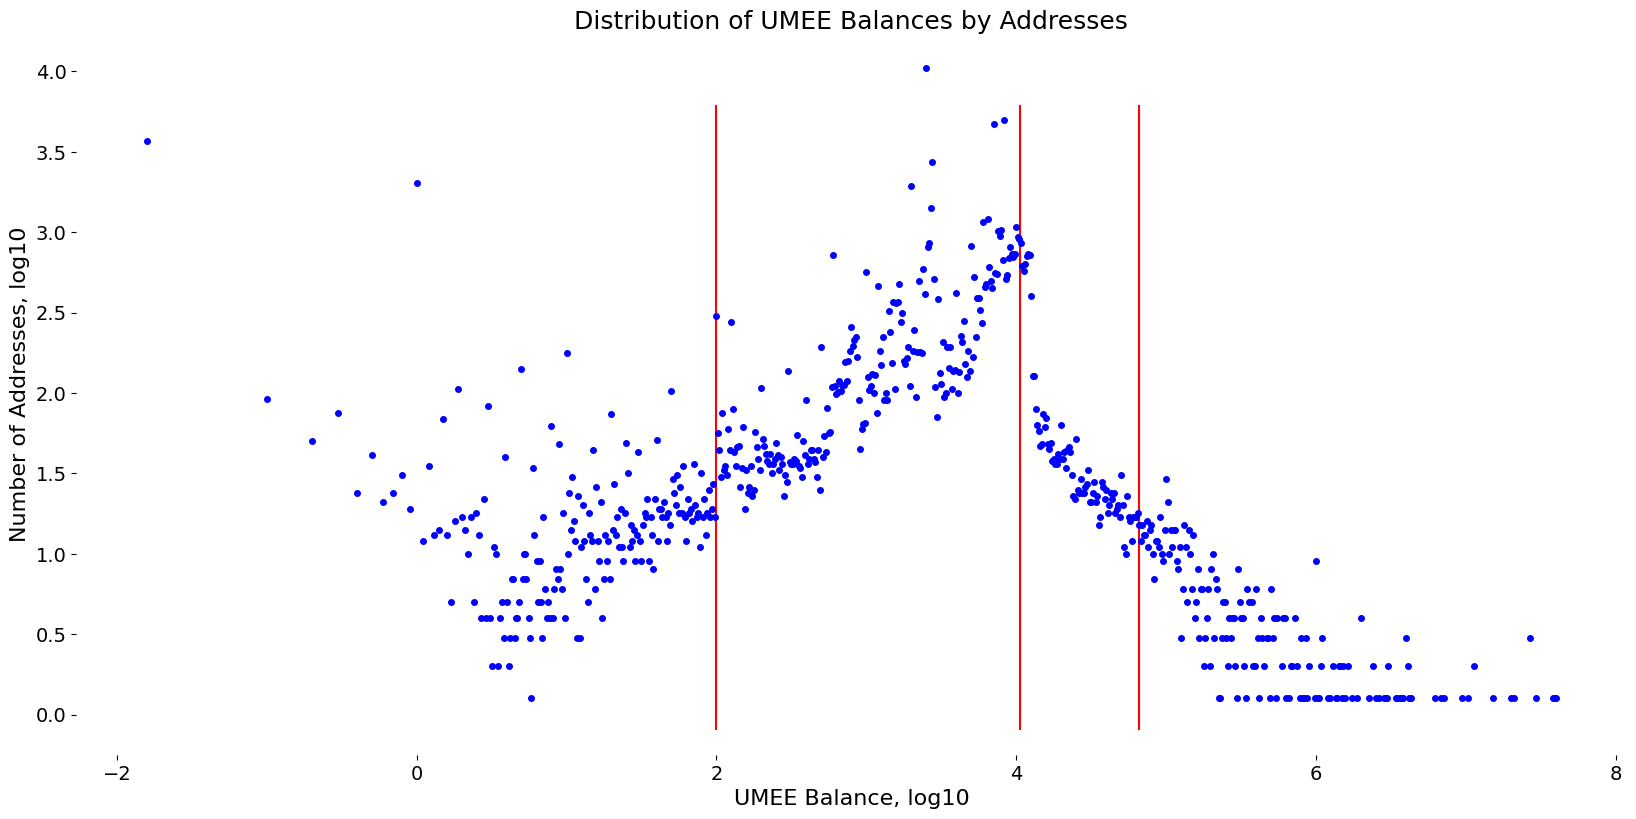

In [10]:
umee_balances_df, umee_boundaries = analyze_chain(
    snapshot_url='data/pussy/umee_3984825.json',
    coin='uumee',
    coin_for_display='UMEE',
    initial_boundary=INITIAL_BOUNDARY_DICT['umee'],
    max_show_value=50_000_000,
    segment='Umee')

### Analysis of Grade Boundaries. Evmos Owners
EVMOS balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,2 < EVMOS Balance <= 760,"97,354",89.0
2,"760 < EVMOS Balance <= 8,865","10,941",10.0
3,"8,865 < EVMOS Balance","1,095",1.0


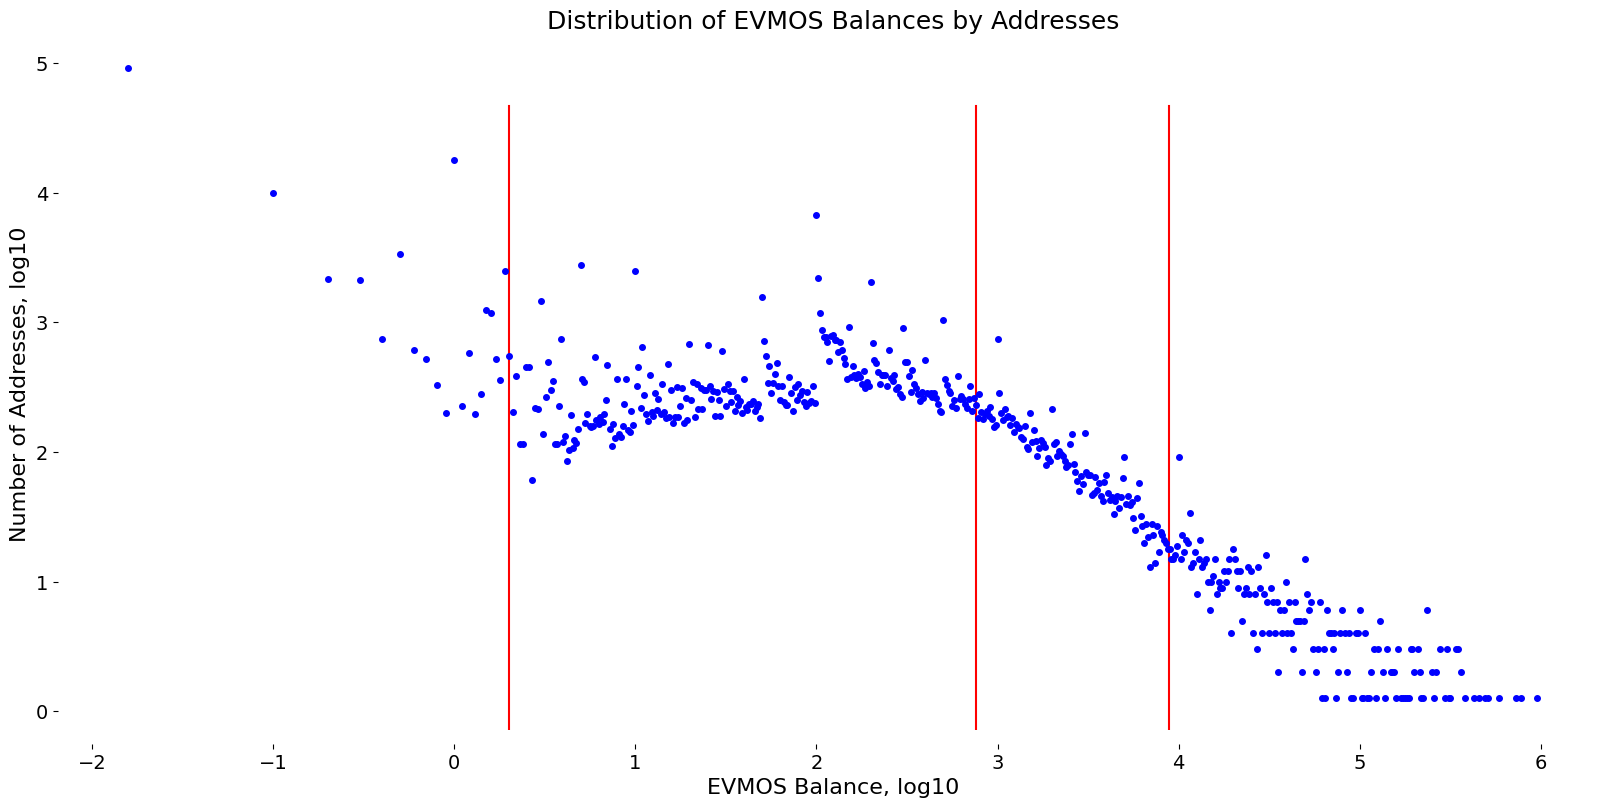

In [11]:
evmos_balances_df, evmos_boundaries = analyze_chain(
    snapshot_url='data/pussy/evmos_7682206.json',
    coin='aevmos',
    coin_for_display='EVMOS',
    initial_boundary=INITIAL_BOUNDARY_DICT['evmos'],
    max_show_value=1_000_000,
    segment='Evmos',
    decimals=18)

### Analysis of Grade Boundaries. Atom Owners
ATOM balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,0.1 < ATOM Balance <= 164,"337,952",89.0
2,"164 < ATOM Balance <= 2,711","38,028",10.0
3,"2,711 < ATOM Balance","3,799",1.0


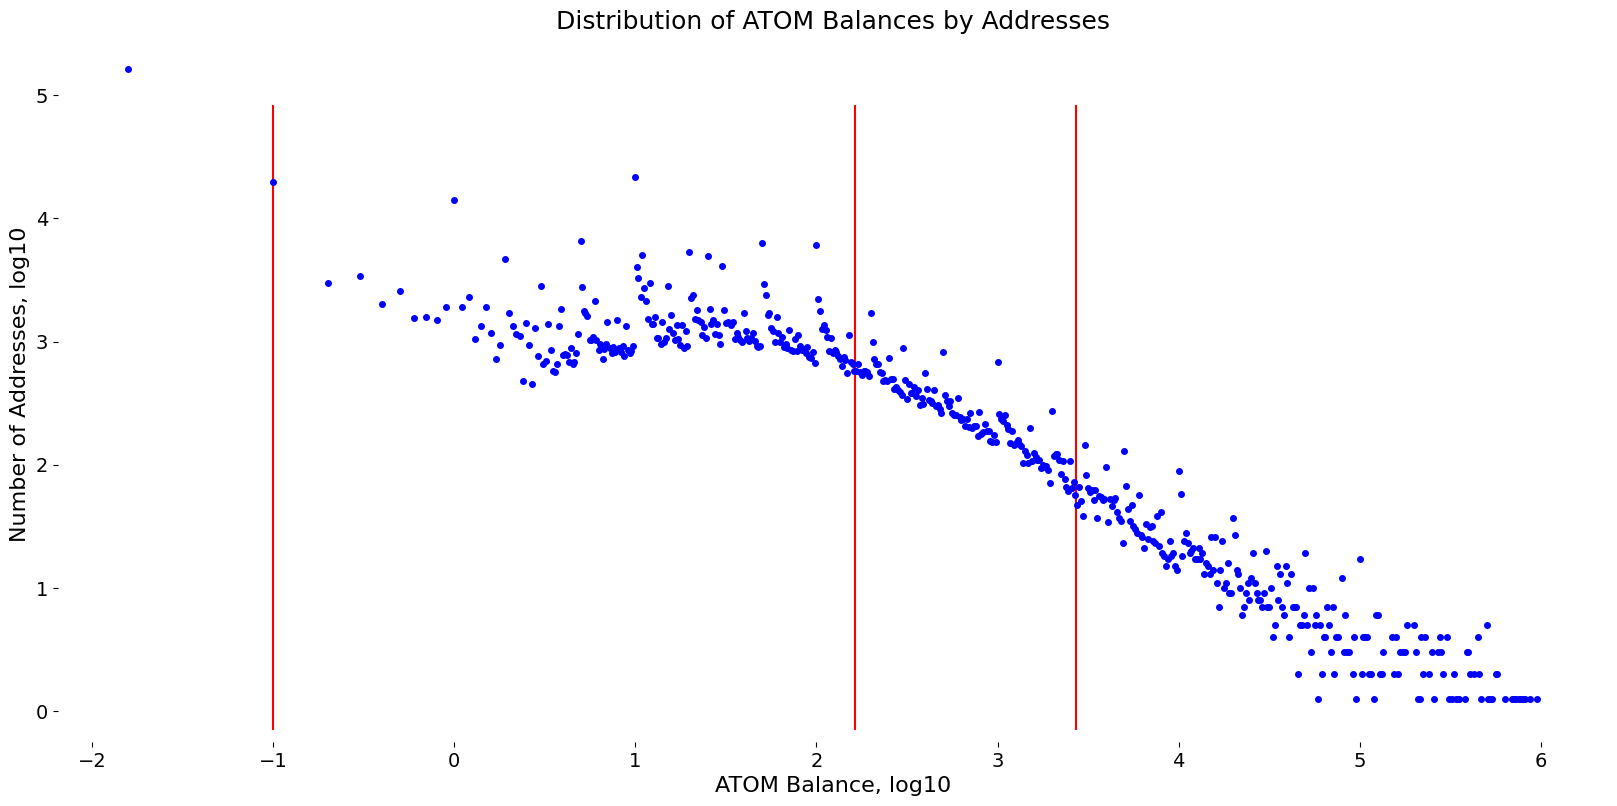

In [12]:
atom_balances_df, atom_boundaries = analyze_chain(
    snapshot_url='data/pussy/cosmoshub_12948921.json',
    coin='uatom',
    coin_for_display='ATOM',
    initial_boundary=INITIAL_BOUNDARY_DICT['atom'],
    max_show_value=1_000_000,
    segment='CosmosHub')

### Analysis of Grade Boundaries. Luna Owners
LUNA balances are calculated as the sum of available, delegated and unbonding balances

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,1 < LUNA Balance <= 387,"396,382",89.0
2,"387 < LUNA Balance <= 6,397","44,871",10.1
3,"6,397 < LUNA Balance","4,154",0.9


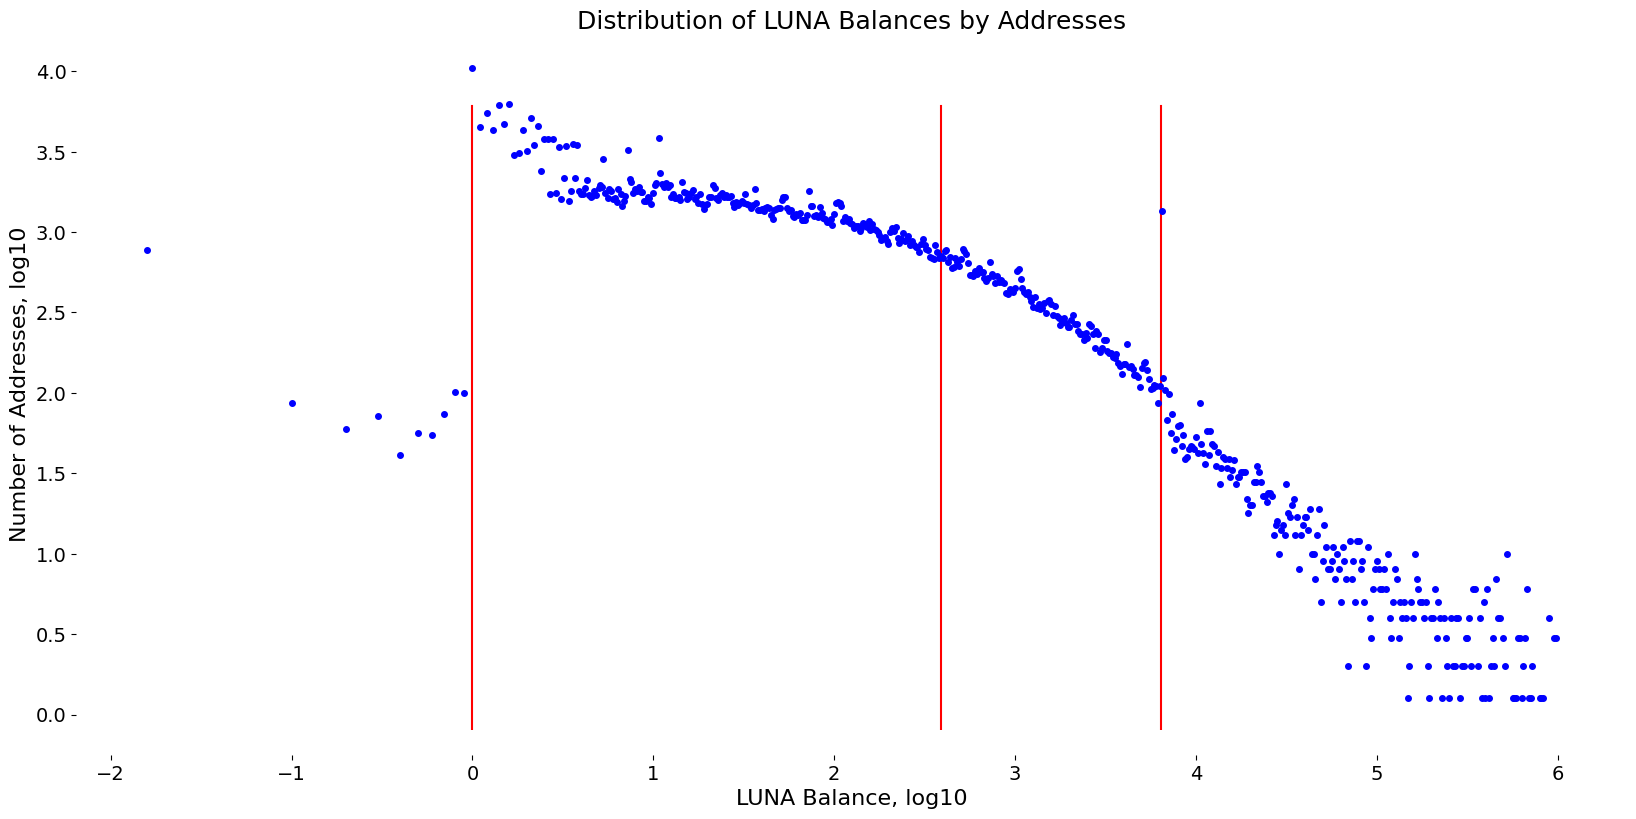

In [13]:
luna_balances_df, luna_boundaries = analyze_chain(
    snapshot_url='data/pussy/terra_2544937.json',
    coin='uluna',
    coin_for_display='LUNA',
    initial_boundary=INITIAL_BOUNDARY_DICT['luna'],
    max_show_value=1_000_000,
    segment='Terra')

### Analysis of Grade Boundaries. Osmo Owners and Liquidity Providers
Amounts of liquidity are calculated based on the balances of pool tokens and the balances of staked pool tokens.
Amounts of liquidity are converted into OSMO based on the pool prices.
OSMO balances are calculated as the sum of available, delegated and unbonding balances.
The ranking is based on the sum of pool liquidity and OSMO balances.

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,"1 < OSMO Balance <= 1,498","159,273",89.0
2,"1,498 < OSMO Balance <= 38,098","17,896",10.0
3,"38,098 < OSMO Balance","1,791",1.0


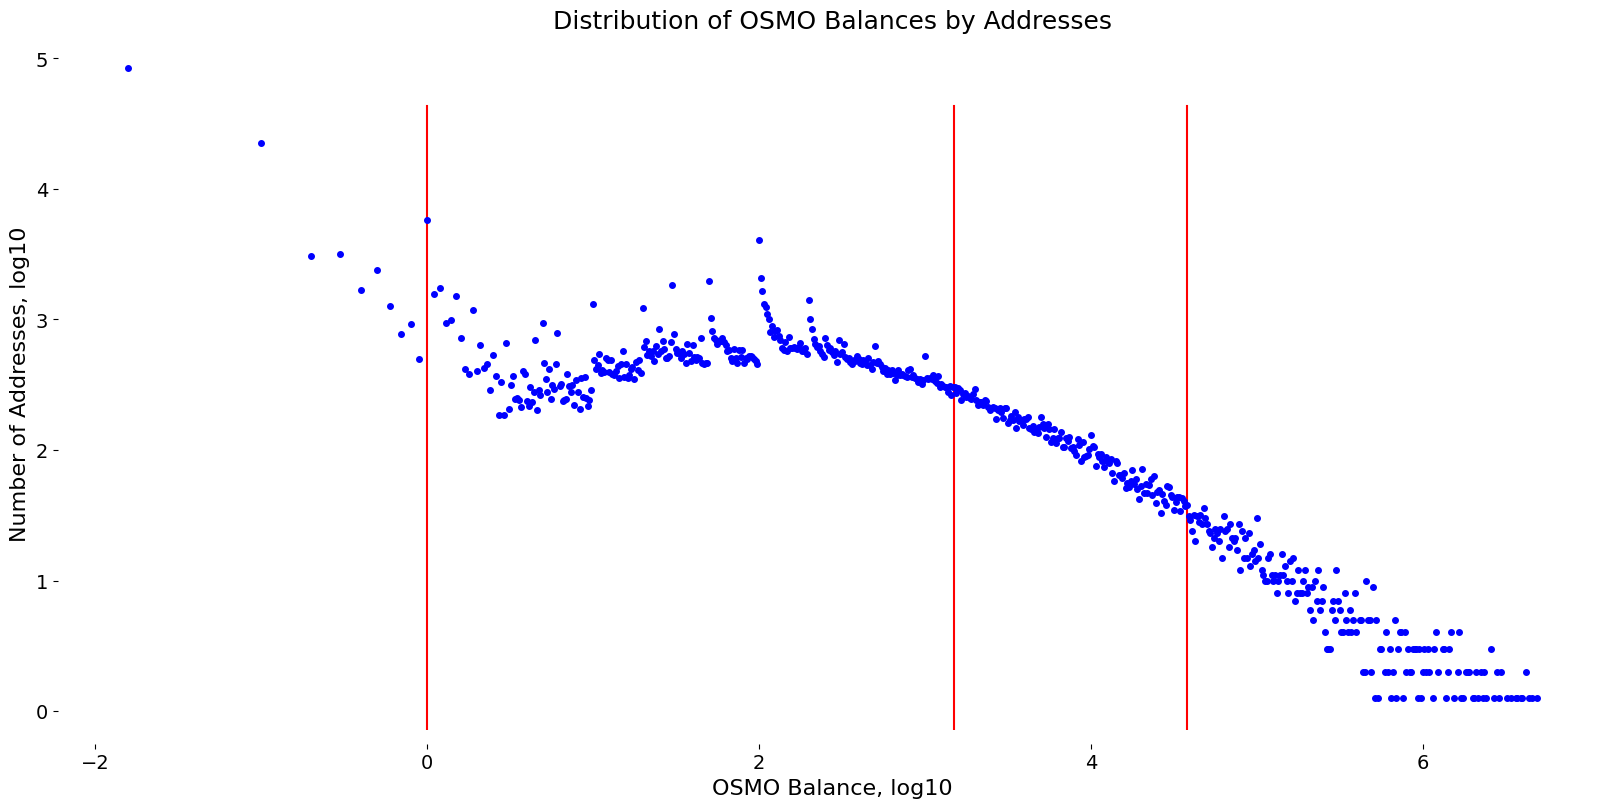

In [14]:
osmo_balances_df, osmo_boundaries = analyze_chain(
    snapshot_url='data/pussy/osmosis_7025000.json',
    coin='uosmo',
    coin_for_display='OSMO',
    initial_boundary=INITIAL_BOUNDARY_DICT['osmo'],
    max_show_value=5_000_000,
    segment='Osmosis')

### Distribution Rules

In [15]:
rules_list = [['Bostrom. BOOT staking balance'] + boot_boundaries,
              ['ChiHuaHua. HUAHUA staking balance'] + huahua_boundaries,
              ['Cosmoshub. ATOM staking balance'] + atom_boundaries,
              ['Desmos. DSM staking balance'] + dsm_boundaries,
              ['Evmos. EVMOS staking balance'] + evmos_boundaries,
              ['Gravity. GRAV staking balance'] + grav_boundaries,
              ['Juno. JUNO staking balance'] + juno_boundaries,
              ['Osmosis. OSMO staking and liquidity balance'] + osmo_boundaries,
              ['Stargaze. STARS staking balance'] + stars_boundaries,
              ['Terra. LUNA staking balance'] + luna_boundaries,
              ['Umee. UMEE staking balance'] + umee_boundaries]
rules_df = pd.DataFrame(rules_list, columns=['Segment', 'Grade 1', 'Grade 2', 'Grade 3'])
rules_df.loc[:, 'Grade 1'] = rules_df['Grade 1'].map(lambda x: f'> {x:>,}')
rules_df.loc[:, 'Grade 2'] = rules_df['Grade 2'].map(lambda x: f'> {x:>,.0f}')
rules_df.loc[:, 'Grade 3'] = rules_df['Grade 3'].map(lambda x: f'> {x:>,.0f}')
display(HTML(rules_df.to_html(index=False, notebook=True, show_dimensions=False)))

Segment,Grade 1,Grade 2,Grade 3
Bostrom. BOOT staking balance,"> 10,000.0","> 1,383,480,819","> 144,305,883,038"
ChiHuaHua. HUAHUA staking balance,"> 10,000.0","> 1,805,215","> 25,590,943"
Cosmoshub. ATOM staking balance,> 0.1,> 164,"> 2,711"
Desmos. DSM staking balance,> 30.0,"> 2,125","> 142,856"
Evmos. EVMOS staking balance,> 2.0,> 760,"> 8,865"
Gravity. GRAV staking balance,> 100.0,"> 14,240","> 930,754"
Juno. JUNO staking balance,> 0.5,> 201,"> 4,136"
Osmosis. OSMO staking and liquidity balance,> 1.0,"> 1,498","> 38,098"
Stargaze. STARS staking balance,> 20.0,"> 6,147","> 125,126"
Terra. LUNA staking balance,> 1.0,> 387,"> 6,397"


### Number of Addresses

In [16]:
balances_df = pd.concat(
    [atom_balances_df,
     boot_balances_df,
     huahua_balances_df,
     dsm_balances_df,
     grav_balances_df,
     evmos_balances_df,
     osmo_balances_df,
     juno_balances_df,
     stars_balances_df,
     umee_balances_df,
     luna_balances_df])
balances_df = balances_df[balances_df.grade == balances_df.grade]

In [17]:
balances_df[['segment', 'grade']].value_counts()

segment    grade
Terra      1.0      396382
CosmosHub  1.0      337952
Osmosis    1.0      159273
Evmos      1.0       97354
Juno       1.0       94712
Umee       1.0       69080
Terra      2.0       44871
CosmosHub  2.0       38028
Stargaze   1.0       36836
ChiHuaHua  1.0       19627
Osmosis    2.0       17896
Evmos      2.0       10941
Juno       2.0       10567
Umee       2.0        7762
Bostrom    1.0        6256
Desmos     1.0        6129
Gravity    1.0        5198
Terra      3.0        4154
Stargaze   2.0        4139
CosmosHub  3.0        3799
ChiHuaHua  2.0        2205
Osmosis    3.0        1791
Evmos      3.0        1095
Juno       3.0        1064
Umee       3.0         776
Bostrom    2.0         702
Desmos     2.0         690
Gravity    2.0         584
Stargaze   3.0         414
ChiHuaHua  3.0         222
Bostrom    3.0          71
Desmos     3.0          69
Gravity    3.0          58
dtype: int64

In [18]:
balances_df[['segment', 'grade']].value_counts().reset_index().rename(columns={0: 'cnt'}).pivot(index='segment',
                                                                                                columns='grade',
                                                                                                values='cnt')

grade,1.0,2.0,3.0
segment,,,
Bostrom,6256,702,71
ChiHuaHua,19627,2205,222
CosmosHub,337952,38028,3799
Desmos,6129,690,69
Evmos,97354,10941,1095
Gravity,5198,584,58
Juno,94712,10567,1064
Osmosis,159273,17896,1791
Stargaze,36836,4139,414


In [19]:
total_addresses = len(balances_df[['segment', 'grade']])
print(f"Total addresses {total_addresses:>,}")

segment_and_grade_df = balances_df[['segment', 'grade']].value_counts().reset_index().rename(
    columns={0: 'cnt'})
segment_df = balances_df[['segment']].value_counts().reset_index().rename(columns={0: 'cnt'})
grade_df = balances_df[['grade']].value_counts().reset_index().rename(columns={0: 'cnt'})
display(HTML(segment_df.to_html(index=False, notebook=True, show_dimensions=False)),
        HTML(grade_df.to_html(index=False, notebook=True, show_dimensions=False)))

Total addresses 1,380,697


segment,cnt
Terra,445407
CosmosHub,379779
Osmosis,178960
Evmos,109390
Juno,106343
Umee,77618
Stargaze,41389
ChiHuaHua,22054
Bostrom,7029
Desmos,6888


grade,cnt
1.0,1228799
2.0,138385
3.0,13513


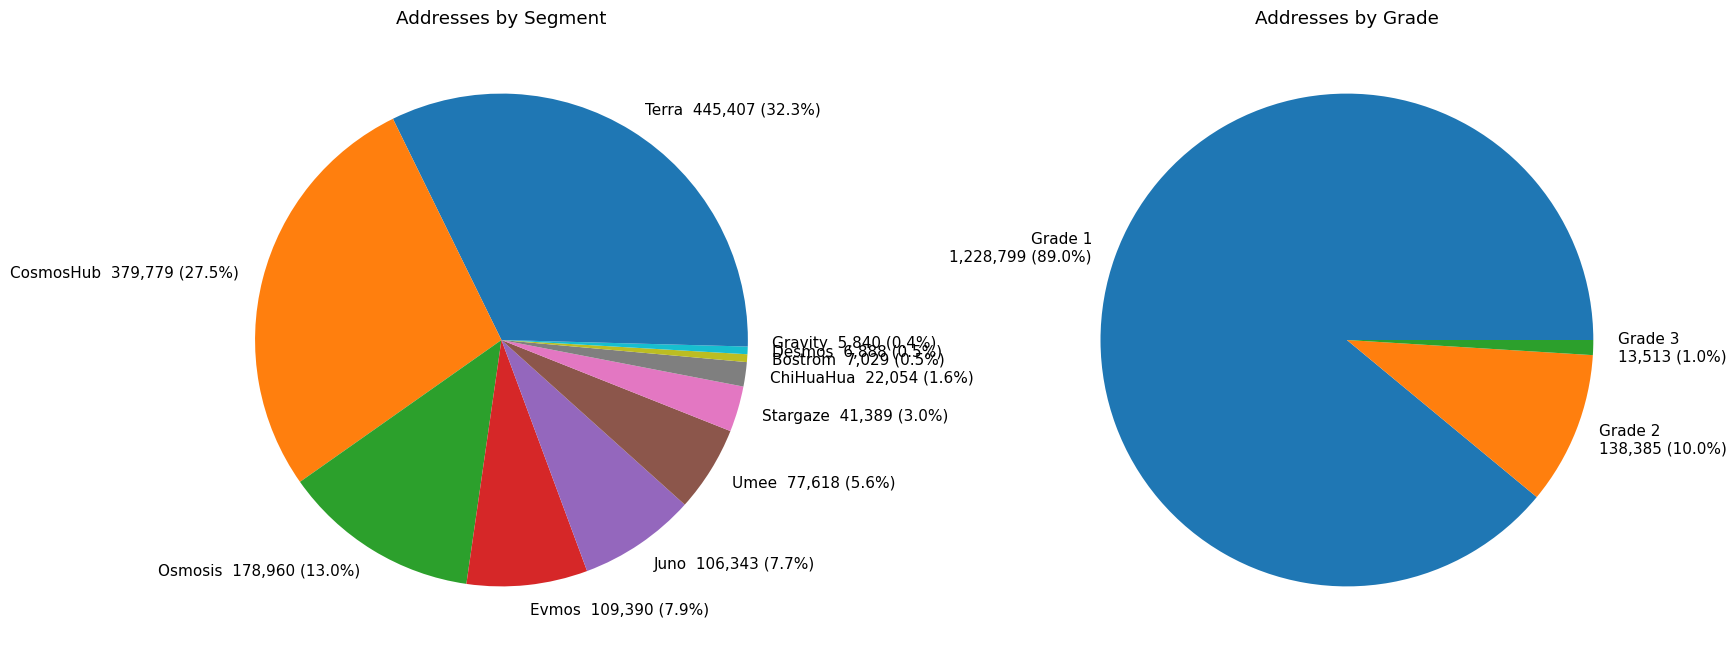

In [20]:
mpl.rcParams['figure.figsize'] = (20.0, 8.0)
plt.rcParams.update({'font.size': 11})

fig, [ax1, ax2] = plt.subplots(ncols=2)

segment_labels = [f'{row.segment}  {row.cnt:>,.0f} ({row.cnt / total_addresses:.1%})' for _, row in
                  segment_df.iterrows()]
grade_labels = [f'Grade {int(row.grade)}\n{row.cnt:>,.0f} ({row.cnt / total_addresses:.1%})' for _, row in
                grade_df.iterrows()]

ax1.pie(segment_df.cnt, labels=segment_labels)
ax1.set_title(label='Addresses by Segment')

ax2.pie(grade_df.cnt, labels=grade_labels)
ax2.set_title(label='Addresses by Grade')

plt.show()

## Gift Distribution

In [21]:
gift_size_for_other_networks = TOTAL_GIFT_SIZE - sum(GIFT_PER_SEGMENT.values())
addresses_cnt_in_other_networks = sum(
    segment_df[~segment_df.segment.isin(GIFT_PER_SEGMENT.keys())].cnt)
addresses_cnt_in_other_networks_by_grade_dict = balances_df[
    ~balances_df.segment.isin(GIFT_PER_SEGMENT.keys())].value_counts('grade').to_dict()
print(f'Total Gift Size: {TOTAL_GIFT_SIZE}\n')
print('\n'.join(f'{k}: {v}' for k, v in GIFT_PER_SEGMENT.items()))
print(f'Gift for other networks: {gift_size_for_other_networks}')

Total Gift Size: 9.5e+17

Bostrom: 1e+17
Desmos: 1e+17
Gift for other networks: 7.5e+17


### Gift per Address

In [22]:
segment_df.loc[:, 'share_of_addresses'] = segment_df.cnt / sum(
    segment_df.cnt)

for grade in range(1, 4):
    segment_df.loc[:, f'cnt_grade_{grade}'] = segment_df.apply(
        lambda row: segment_and_grade_df[
            (segment_and_grade_df.segment == row.segment) & (
                    segment_and_grade_df.grade == grade)].cnt.values[0],
        axis=1)
    segment_df.loc[:, f'gift_per_address_grade_{grade}'] = segment_df.apply(
        lambda row: int(round(GIFT_PER_SEGMENT[row.segment] / 3 / row[
            f'cnt_grade_{grade}'] if row.segment in GIFT_PER_SEGMENT.keys() else gift_size_for_other_networks / 3 /
                                                                                 addresses_cnt_in_other_networks_by_grade_dict[
                                                                                     float(grade)], -10)),
        axis=1)

segment_df.loc[:, 'gift_amount'] = segment_df.apply(
    lambda row: GIFT_PER_SEGMENT[
        row.segment] if row.segment in GIFT_PER_SEGMENT.keys() else sum(
        [row[f'cnt_grade_{_grade}'] * row[f'gift_per_address_grade_{_grade}'] for _grade in range(1, 4)]),
    axis=1)
segment_df.loc[:, 'gift_per_address_avg'] = segment_df.apply(
    lambda row: GIFT_PER_SEGMENT[
                    row.segment] / row.cnt if row.segment in GIFT_PER_SEGMENT.keys() else row.gift_amount / row.cnt,
    axis=1)

display(HTML(segment_df.to_html(index=False, notebook=True, show_dimensions=False)))

segment,cnt,share_of_addresses,cnt_grade_1,gift_per_address_grade_1,cnt_grade_2,gift_per_address_grade_2,cnt_grade_3,gift_per_address_grade_3,gift_amount,gift_per_address_avg
Terra,445407,0.322596,396382,210000000000,44871,1820000000000,4154,18690000000000,2.425437e+17,5.445440e+11
CosmosHub,379779,0.275063,337952,210000000000,38028,1820000000000,3799,18690000000000,2.111842e+17,5.560713e+11
Osmosis,178960,0.129616,159273,210000000000,17896,1820000000000,1791,18690000000000,9.949184e+16,5.559446e+11
Evmos,109390,0.079228,97354,210000000000,10941,1820000000000,1095,18690000000000,6.082251e+16,5.560153e+11
Juno,106343,0.077021,94712,210000000000,10567,1820000000000,1064,18690000000000,5.900762e+16,5.548802e+11
Umee,77618,0.056217,69080,210000000000,7762,1820000000000,776,18690000000000,4.313708e+16,5.557613e+11
Stargaze,41389,0.029977,36836,210000000000,4139,1820000000000,414,18690000000000,2.300620e+16,5.558530e+11
ChiHuaHua,22054,0.015973,19627,210000000000,2205,1820000000000,222,18690000000000,1.228395e+16,5.569942e+11
Bostrom,7029,0.005091,6256,5330000000000,702,47480000000000,71,469480000000000,1.000000e+17,1.422677e+13
Desmos,6888,0.004989,6129,5440000000000,690,48310000000000,69,483090000000000,1.000000e+17,1.451800e+13


### Final Distribution

In [23]:
segment_and_grade_flat_df = pd.DataFrame(columns=['segment', 'grade', 'gift'])

for i in range(1, 4):
    segment_item_df = segment_df[
        ['segment', f'gift_per_address_grade_{i}']].copy().rename(
        columns={f'gift_per_address_grade_{i}': 'gift'})
    segment_item_df.loc[:, 'grade'] = i
    segment_and_grade_flat_df = segment_and_grade_flat_df.append(segment_item_df)

In [24]:
final_distribution_df = balances_df[['address', 'grade', 'segment']].merge(
    segment_and_grade_flat_df,
    how='left',
    on=['grade', 'segment'])
final_distribution_df.to_csv(FINAL_STATE_FILE_NAME, index=False)
final_distribution_df.head()

,address,grade,segment,gift
0,cosmos100000aeu2lh0jrrnmn2npc88typ25u7td9wqxv,2,CosmosHub,1820000000000
1,cosmos10005vr6w230rer02rgwsvmhh0vdpk9hv6wla36,1,CosmosHub,210000000000
2,cosmos100080ak7ge6pkqf6s3el7et0jd579n65fytesw,1,CosmosHub,210000000000
3,cosmos1000e3j8mesez4pma6fpn42ufn2xluhvh59uwt4,1,CosmosHub,210000000000
4,cosmos1000g09cm584wzmwuszdyvryg6p62xkauqud2jc,1,CosmosHub,210000000000


In [25]:
ipfs_client = ipfshttpclient.Client()
with open(FINAL_STATE_FILE_NAME) as state_file:
    state_ipfs_address = ipfs_client.add_bytes(bytes(state_file.read(), encoding='utf-8'))
print(f'Final Distribution IPFS address  {state_ipfs_address}')

Final Distribution IPFS address  QmcLjbToBmDZoDyxyCSGQHm5ko3BhmkDTzB17JoKrz8HRi
